In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from torch import nn
from sklearn.metrics import r2_score

In [2]:
seed=30

In [3]:
torch.set_default_device('cuda')
# torch.manual_seed_all(seed)
torch.cuda.manual_seed_all(seed)

In [4]:
X,y= make_regression(100,n_features=1,noise=0.4,random_state=seed)
y=y.reshape(-1,1)

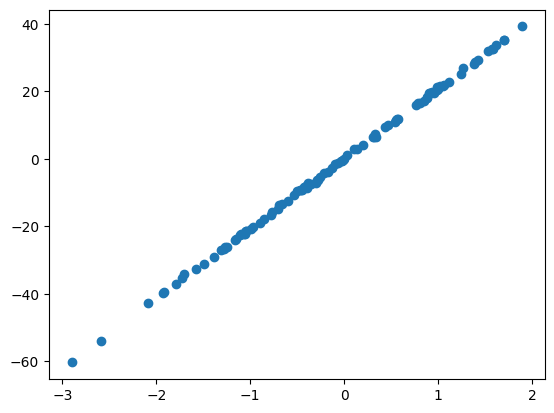

In [5]:
plt.scatter(X,y)

In [6]:
X= torch.tensor(X)
y= torch.tensor(y)

In [7]:
X.shape,y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [8]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [9]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights= nn.Parameter(torch.randn(1,requires_grad=True,dtype=float))
        self.bias= nn.Parameter(torch.randn(1,requires_grad=True,dtype=float))

    def forward(self,X):
        return self.weights*X + self.bias
    




In [10]:
model = LinearRegression()

In [18]:
epochs =250
lr=0.1

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=lr)

loss_list=[]
val_loss_list=[]
val_accuracy_list=[]
accuracy_list=[]

for i in range(epochs):

    model.train() # make parameters ready

    y_pred=model(X_train) # perform forward propagation


    score=(r2_score(y_train.numpy(force=True),y_pred.numpy(force=True)))
    accuracy_list.append(score)


    loss = loss_fn(y_pred,y_train) #calculate loss

    loss_list.append(loss.item())

    optimizer.zero_grad() # reset accumulating gradients

    
    loss.backward() # perform back propagation

    optimizer.step() # perform gradient descent to update parameters

    model.eval()


    with torch.inference_mode():
        y_pred=model(X_test)
        val_loss=loss_fn(y_pred,y_test)
        val_loss_list.append(val_loss.item())
        scores=(r2_score(y_test.numpy(force=True),y_pred.numpy(force=True)))
        val_accuracy_list.append(scores)

    if i%10==0:

        print(f"epochs: {i} accuracy={score} loss={loss} val_accuracy={scores} val_loss={val_loss}   ")



epochs: 0 accuracy=0.9996753736900045 loss=0.3075749470550013 val_accuracy=0.999713224963858 val_loss=0.3319083365290992   
epochs: 10 accuracy=0.9996757606691741 loss=0.30759111527725075 val_accuracy=0.99971401323614 val_loss=0.3316149194384226   
epochs: 20 accuracy=0.9996761397633088 loss=0.3076072834994997 val_accuracy=0.9997147937267802 val_loss=0.3313215023477455   
epochs: 30 accuracy=0.9996751472177997 loss=0.3075864092159659 val_accuracy=0.9997155664357786 val_loss=0.3310280852570684   
epochs: 40 accuracy=0.9996755387386154 loss=0.30758180265596285 val_accuracy=0.9997135601549416 val_loss=0.3317839226969611   
epochs: 50 accuracy=0.9996759223743963 loss=0.3075979708782118 val_accuracy=0.9997143451276753 val_loss=0.33149050560628324   
epochs: 60 accuracy=0.9996759648324618 loss=0.3076320529081583 val_accuracy=0.9997151223187672 val_loss=0.3311970885156054   
epochs: 70 accuracy=0.9996753141921458 loss=0.30757383597325616 val_accuracy=0.9997161622664016 val_loss=0.330659721511

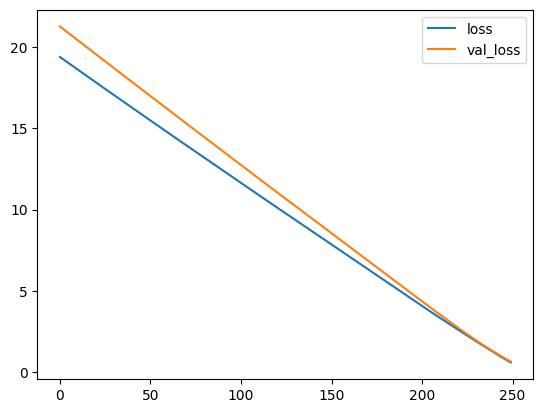

In [15]:
plt.plot(loss_list,label='loss')
plt.plot(val_loss_list,label='val_loss')
plt.legend()

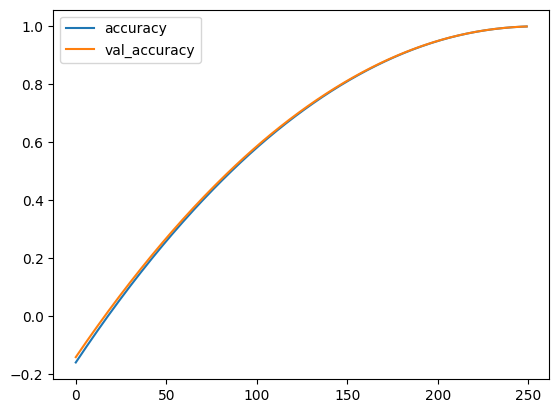

In [16]:
plt.plot(accuracy_list,label='accuracy')
plt.plot(val_accuracy_list,label='val_accuracy')
plt.legend()